In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#from sklearn_pandas import CategoricalImputer

# Loading Dataset


In [2]:
# Reading the data
# Loading the csv data to a Pandas dataframe
data = pd.read_csv("K:\INSURANCE _FRAUD_DETECTION\DATA\insuranceFraud.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [5]:
data.shape

(1000, 39)

In [6]:
# Making a list of columns that are not necessary for prediction
columns_to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
# Dropping the unnecessary columns
data.drop(columns = columns_to_drop, inplace=True)

### Handelling Missing Values

In [8]:
# In this dataset missing values have been denoted by '?'.
# We are replacing '?' with NaN(not a number) value for them to be imputed down the line 
data = data.replace('?',np.nan)

In [9]:
# Checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [10]:
data.shape

(1000, 28)

In [11]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [12]:
#checking for the number of categorical and numerical variable.
data.info()
# As we see collision_type, property_damage & police_report_available all 
# are categorical columns so based on that we are going to have an imputation strategy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_date                1000 non-null   object 
 13  incident_type      

In [13]:
!pip install sklearn-pandas

In [14]:
    # Mode imputation for 'collision_type' column
most_frequent_category = data['collision_type'].mode().iloc[0]
data['collision_type'] = data['collision_type'].fillna(most_frequent_category)

# Mode imputation for 'property_damage'column
most_frequent_category = data['property_damage'].mode().iloc[0]
data['property_damage'] = data['property_damage'].fillna(most_frequent_category)

# Mode imputation for 'police_report_available' column
most_frequent_category = data['police_report_available'].mode().iloc[0]
data['police_report_available'] = data['police_report_available'].fillna(most_frequent_category)



In [15]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include = ['object']).copy()

In [16]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,1/21/2015,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,2/17/2015,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [17]:
cat_df.shape

(1000, 13)

* Checking the categorical values present in the column to decide for getDummies encode or custom mapping to convert categorical data to numerical one. 

In [18]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available',
       'fraud_reported'],
      dtype='object')

Checking unique values in each column.

In [19]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [ ]:
cat_df['insured_sex'].unique()

In [ ]:
cat_df['insured_education_level'].unique()

In [ ]:
#cat_df['insured_occupation'].unique()

In [ ]:
#cat_df['insured_relationship'].unique()

In [ ]:
#cat_df['incident_date'].unique()

In [ ]:
#cat_df['incident_type'].unique()

In [ ]:
#cat_df['collision_type'].unique()

In [ ]:
cat_df['incident_severity'].unique()

In [ ]:
#cat_df['authorities_contacted'].unique()

In [ ]:
cat_df['property_damage'].unique()

In [ ]:
cat_df['police_report_available'].unique()

In [ ]:
cat_df['fraud_reported'].unique()

### Encoding Categorical Columns

In [20]:
# Custom mapping(label encoding or ordinal encoding) for encoding when dealing with ordinal categorical data, 
# where the categories have a meaningful order or ranking.

cat_df['policy_csl'] = cat_df['policy_csl'].map({'250/500':2.5, '100/300':1, '500/1000':5})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'MALE':0, 'FEMALE':1})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD':1,'High School':2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage':1,'Minor Damage':2,'Major Damage':3,'Total Loss':4})
cat_df['property_damage'] = cat_df['property_damage'].map({'YES':1, 'NO':0})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'YES':1, 'NO':0})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'Y':1, 'N':0})


In [21]:
# Auto encoding or One-Hot Encoding or dummy encoding with the help of "get_dummies" when dealing with nominal categorical data,
# where the categories have no inherent order or ranking.
# get_dummies creates binary columns for each category, which is helpful when the order of categories doesn't matter.

for col in cat_df.drop(columns = ['policy_csl', 'insured_sex', 'insured_education_level','incident_severity',
                                  'property_damage', 'police_report_available','fraud_reported']).columns:cat_df = pd.get_dummies(cat_df,columns = [col], prefix = [col], drop_first = True)

In [22]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,incident_date_3/1/2015,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,0,6,3,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,0,6,2,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,1,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,1,7,3,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,0,5,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [23]:
# Extracting the numerical columns
num_df = data.select_dtypes(include = ['int64']).copy()

In [24]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [25]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [26]:
# Combining the numerical and categorical dataframes to get our final dataframe

final_df = pd.concat([num_df,cat_df], axis = 1) 

In [27]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_date_3/1/2015,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


## Some Basic Visualisations

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

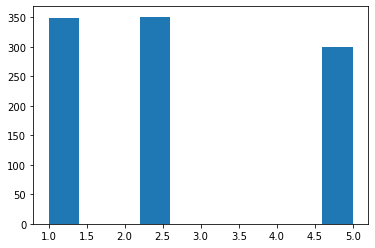

In [30]:
# looking at the distribution for some columns now
plt.hist(final_df['policy_csl'])

* We can see that for almost all categories of CSL the data is uniformally distributed.

In [31]:
import seaborn as sns

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

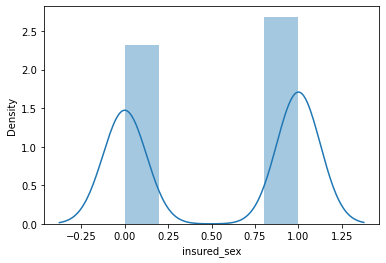

In [32]:
sns.distplot(final_df['insured_sex'])

* we can see that for almost both the categories of the gender of the insurer the data is uniformally distributed.

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

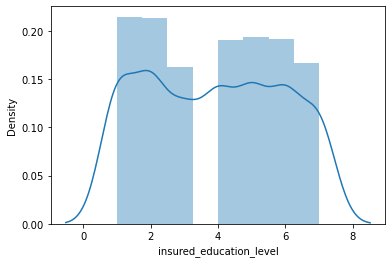

In [33]:
sns.distplot(final_df['insured_education_level'])

* we have kind of uniform distribution for all levels of education

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

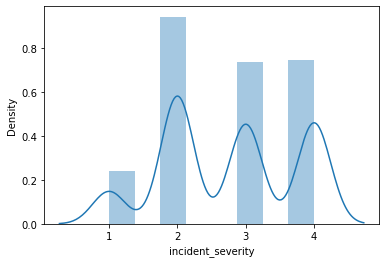

In [34]:
sns.distplot(final_df['incident_severity'])

* We can see that there are least claims for trivial incidents, most claims for minor incidents and almost equal claims for major and total loss.


C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

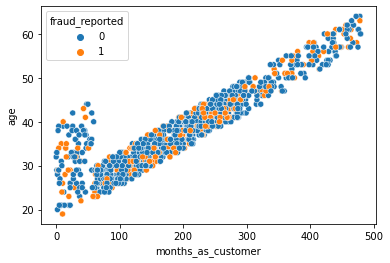

In [35]:
sns.scatterplot(final_df['months_as_customer'], final_df['age'], hue = final_df['fraud_reported'])

* From the graph it can be concluded that most of the fraud cases are done by the customers that are new to the company and that too comparitively younger ones. If we see that people aged between 20-45 and they are not that long associated with the bank i.e 300 months they have more number of fraudelent claims than rest.

In [36]:
correlation = num_df.corr()
print(correlation['months_as_customer'].sort_values(ascending = False),'\n')

months_as_customer             1.000000
age                            0.922098
incident_hour_of_the_day       0.070639
injury_claim                   0.065329
total_claim_amount             0.062108
vehicle_claim                  0.061013
witnesses                      0.058383
property_claim                 0.034940
policy_deductable              0.026807
capital-loss                   0.020209
umbrella_limit                 0.015498
number_of_vehicles_involved    0.014736
capital-gains                  0.006399
bodily_injuries               -0.010162
Name: months_as_customer, dtype: float64 



<AxesSubplot:>

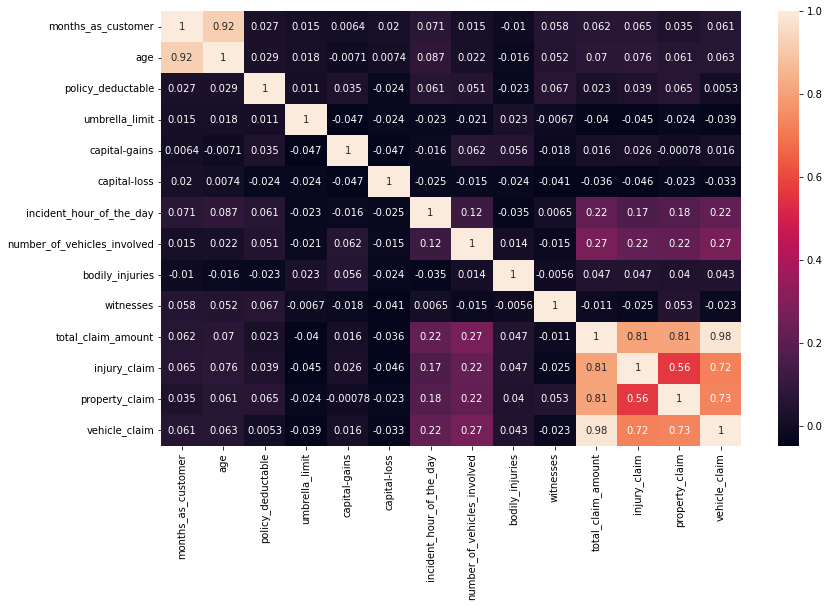

In [37]:
plt.figure(figsize = (13,8))
sns.heatmap(num_df.corr(), annot = True)

In [42]:
final_df['fraud_reported'].sum()  # imbalance data

247

In [43]:
# seperating the feature and target columns
y = final_df['fraud_reported']
x = final_df.drop('fraud_reported', axis = 1)  # axis parameter is set to 1 to indicate that we are operating along the columns.

In [44]:
x.drop(columns = ['age','total_claim_amount'], inplace = True)

In [45]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

## Splitting the data for predictions

In [46]:
# splitting the data into training and test set for model training

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 355)

In [47]:
#!pip install imbalanced-learn
!pip install --upgrade scikit-learn xgboost imbalanced-learn

In [48]:
!pip install --upgrade scikit-learn threadpoolctl


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
import numpy as np


# Assuming you have your data as numpy arrays or pandas DataFrames, train_x and train_y
# train_x contains the feature vectors, and train_y contains the corresponding class labels (0 or 1)

# Create an instance of SMOTE
sm = SMOTE(random_state=42)

# Fit and apply SMOTE on your data
train_x_res, train_y_res = sm.fit_resample(train_x, train_y)

# Check the new class distribution after oversampling
print("Original class distribution:")
print(np.bincount(train_y))

print(train_y.sum())

print("Resampled class distribution:")
print(np.bincount(train_y_res))
print("After OverSampling, counts of label '1': {}".format(sum(train_y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(train_y_res == 0)))

Original class distribution:
[571 179]
179
Resampled class distribution:
[571 571]
After OverSampling, counts of label '1': 571
After OverSampling, counts of label '0': 571


In [51]:
train_x_res.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_date_3/1/2015,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,254,500,0,35700,0,6,3,2,2,13720,...,0,0,0,0,0,0,0,0,0,0
1,95,1000,0,0,-70300,3,1,1,2,640,...,0,0,0,1,1,0,0,1,0,0
2,56,500,0,0,-28800,13,1,1,2,0,...,0,0,1,0,1,0,0,0,0,1
3,322,2000,0,0,-46000,18,1,0,2,7680,...,0,0,1,0,1,0,0,0,0,0
4,147,1000,6000000,0,-48400,2,2,1,2,9760,...,0,0,0,0,1,0,0,0,1,0


In [54]:
num_df_train = train_x_res[['months_as_customer','policy_deductable','umbrella_limit',
                 'capital-gains','capital-loss','incident_hour_of_the_day',
                 'number_of_vehicles_involved','bodily_injuries','witnesses',
                 'injury_claim','property_claim','vehicle_claim']]
num_df_test = test_x[['months_as_customer','policy_deductable','umbrella_limit',
                 'capital-gains','capital-loss','incident_hour_of_the_day',
                 'number_of_vehicles_involved','bodily_injuries','witnesses',
                 'injury_claim','property_claim','vehicle_claim']]

In [55]:
num_df_train.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [56]:
num_df_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,254,500,0,35700,0,6,3,2,2,13720,6860,61740
1,95,1000,0,0,-70300,3,1,1,2,640,320,2240
2,56,500,0,0,-28800,13,1,1,2,0,6500,52000
3,322,2000,0,0,-46000,18,1,0,2,7680,7680,26880
4,147,1000,6000000,0,-48400,2,2,1,2,9760,4880,39040


In [57]:
print(train_x_res.shape)
print(num_df_train.shape)

(1142, 104)
(1142, 12)


In [58]:
# scaling the numeric values in the dataset
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
# we are scaling our data
scaled_data_train = scaler.fit_transform(num_df_train)
# part which contains only the numerical data
scaled_num_df_1 = pd.DataFrame(data = scaled_data_train, columns = num_df_train.columns, index = train_x_res.index)
scaled_num_df_1.shape

(1142, 12)

In [60]:
# we are scaling our data
scaled_data_test = scaler.fit_transform(num_df_test)
# part which contains only the numerical data
scaled_num_df_2 = pd.DataFrame(data = scaled_data_test, columns = num_df_test.columns, index = test_x.index)
scaled_num_df_2.shape

(250, 12)

In [61]:
scaled_num_df_1.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [62]:
scaled_num_df_2.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [63]:
train_x_res.drop(columns = scaled_num_df_1.columns,inplace = True) # from the original data we are dropping scaled numerical values

In [64]:
train_x_res = pd.concat([scaled_num_df_1, train_x_res],axis=1) # old categorical values as well as scaled numerical values

In [65]:
test_x.drop(columns = scaled_num_df_2.columns,inplace = True) # from the original data we are dropping scaled numerical 

## Modeling

### 1. Logistic Regression

In [66]:
test_x = pd.concat([scaled_num_df_2, test_x],axis=1) # old categorical values as well as scaled numerical values

In [67]:
from sklearn.feature_selection import RFE 
from sklearn.model_selection import cross_val_score


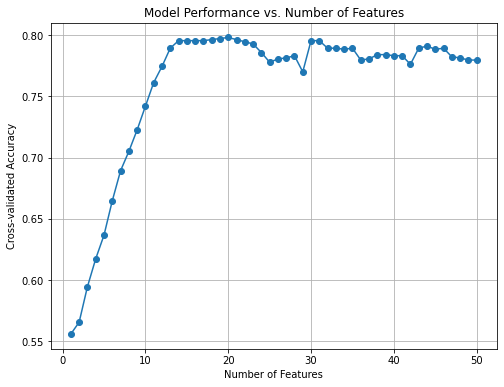

[0.5560599095993258, 0.5656937102581783, 0.5946180954569831, 0.6174059603156362, 0.636673561633341, 0.6647284149237722, 0.6892706657473378, 0.705044817283383, 0.7225886769325058, 0.7418945836206237, 0.7612043208457827, 0.7743545545085422, 0.7892744962843791, 0.7954186776986134, 0.7954186776986134, 0.7954186776986134, 0.7954186776986134, 0.7962920401440282, 0.797165402589443, 0.798042595571899, 0.7962843790699455, 0.7945299931050332, 0.7927794376771623, 0.7857580632804719, 0.7778633264383666, 0.7804949053857351, 0.78136826783115, 0.7831226537960623, 0.769976250670344, 0.7954263387726959, 0.7954263387726959, 0.789285987895503, 0.789285987895503, 0.7884087949130468, 0.789285987895503, 0.7796368650884854, 0.7805178886079828, 0.7840189994637248, 0.7840189994637248, 0.7831418064812686, 0.7831418064812686, 0.7761242626216196, 0.7892706657473377, 0.7910135601011261, 0.7883819811537578, 0.7892591741362139, 0.7822339692024822, 0.781356776220026, 0.7796100513291964, 0.7796100513291964]


In [68]:
logreg_model = LogisticRegression(max_iter=3000)

# Step 4: Cross-validation to determine the optimal number of features
max_features_to_try = 50  # Try up to 20 features
accuracy_scores = []

for num_features in range(1, max_features_to_try + 1):
    rfe = RFE(estimator = logreg_model, n_features_to_select=num_features)
    selected_features = rfe.fit_transform(train_x_res, train_y_res)
    scores = cross_val_score(logreg_model, selected_features, train_y_res, cv=5)
    accuracy_scores.append(scores.mean())

# Step 5: Plot the performance (accuracy) against the number of features
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_features_to_try + 1), accuracy_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Cross-validated Accuracy")
plt.title("Model Performance vs. Number of Features")
plt.grid(True)
plt.show()
print(accuracy_scores)

we employed Recursive Feature Elimination (RFE) and cross-validation to
identify the optimal number of features for a Logistic Regression model. 
Our analysis revealed that including approximately 15 features led to 
the highest cross-validated accuracy. 

In [69]:
!pip install mlxtend

In [70]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features = 15,
                                forward = True,
                                scoring = 'accuracy',
                                cv = None)
selected_features = sfs.fit(train_x_res, train_y_res)

In [71]:
selected_feature_indices = list(sfs.k_feature_idx_)
print(selected_feature_indices)

[2, 15, 20, 34, 37, 42, 53, 71, 74, 78, 92, 94, 98, 99, 100]


In [72]:
train_x_res.iloc[:,selected_feature_indices]

,umbrella_limit,incident_severity,insured_occupation_exec-managerial,insured_relationship_unmarried,incident_date_1/11/2015,incident_date_1/16/2015,incident_date_1/26/2015,incident_date_2/14/2015,incident_date_2/17/2015,incident_date_2/20/2015,incident_date_2/8/2015,incident_date_3/1/2015,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire
0,-0.503053,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.503053,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.503053,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.503053,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.026385,4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,-0.503053,3,0,0,0,0,0,0,0,0,0,0,0,0,0
1138,2.447959,3,0,0,0,0,0,0,0,0,0,0,0,0,0
1139,1.604812,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1140,-0.503053,2,0,0,0,0,0,0,0,0,0,0,0,1,0


In [78]:
# LOGISTIC REGRESSION
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()  # As logistic regression basically does classification
#from sklearn.model_selection import GridSearchCV
#parameter = {'penalty': ['l1','l2','elasticnet'],'C':[0.5,1,2,10,20],'max_iter':[2000]}
#classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv = 5)
#classifier_regressor.fit(train_x_res,train_y_res)

classifier.fit(train_x_res.iloc[:,selected_feature_indices],train_y_res)

#print(classifier_regressor.best_params_)
#print(classifier_regressor.best_score_) # 73% accuracy
## prediction 
#pred_y = classifier_regressor.predict(test_x)

log_pred_y = classifier.predict(test_x.iloc[:,selected_feature_indices])

## accuracy score based on test data
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(log_pred_y, test_y)
print("Logistic Regression accuracy:",score)
print("\n")
print("Classification Report:")
print(classification_report(log_pred_y, test_y))
print("\n")
print("Confusion matrix:")
print(confusion_matrix(log_pred_y, test_y))



Logistic Regression accuracy: 0.624


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       186
           1       0.28      0.30      0.29        64

    accuracy                           0.62       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.63      0.62      0.63       250



Confusion matrix:
[[137  49]
 [ 45  19]]


In [79]:
print(log_pred_y)

[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1]


### 2. Decision Tree

In [80]:
# Decision Tree using Pre-pruning

from sklearn.tree import DecisionTreeClassifier

In [81]:
# Prepruning 
parameter = {'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[3,4,5,6,8,10,12,15],
            'max_features':['auto','sqrt','log2']}
            #'min_samples_leaf':[1,2,3,4,5],
            #'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4],
            #'max_leaf_nodes':[None,10,20,30,40,50,60,70]}

In [82]:
from sklearn.model_selection import GridSearchCV

treemodel = DecisionTreeClassifier(max_depth = 4 , random_state = 42)
cv = GridSearchCV(treemodel, param_grid = parameter, cv = 5, scoring = 'accuracy')

In [83]:
cv.fit(train_x_res.iloc[:,selected_feature_indices],train_y_res)
print(cv.best_params_)
print(cv.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'splitter': 'best'}
0.7908373553972267


C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Khyati\anaconda3\lib\site-p

In [87]:
from sklearn.metrics import accuracy_score, classification_report

DT_y_pred = cv.predict(test_x.iloc[:,selected_feature_indices])
score = accuracy_score(DT_y_pred,test_y)
print("Decision Tree Classifier Accuracy:",score)
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(DT_y_pred, test_y))
print("\n")
print("Predicted Probabilities:")
print(DT_y_pred)
print("\n")
print("Classification Report:")
print(classification_report(DT_y_pred,test_y))

Decision Tree Classifier Accuracy: 0.708


Confusion Matrix:
[[135  26]
 [ 47  42]]


Predicted Probabilities:
[1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       161
           1       0.62      0.47      0.54        89

    accuracy                           0.71       250
   macro avg       0.68      0.66      0.66       250
weighted avg       0.70      0.71      0.70       250



### 3. Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
    

In [89]:
parameter = {'criterion':['gini','entropy','log_loss'],
             'max_depth':[3,4,5,6,8,10,12,15],
             'min_samples_split' : [2,5,10,12,15,20,30],
            'n_estimators':[50,100],
             }

In [90]:
#from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state = 2)
cv1 = GridSearchCV(RFC, param_grid = parameter, cv = 5, scoring = 'accuracy')

In [92]:
cv1.fit(train_x_res.iloc[:,selected_feature_indices],train_y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_samples_split': [2, 5, 10, 12, 15, 20, 30],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [93]:
print(cv1.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 12, 'n_estimators': 100}


In [95]:
RF_y_pred = cv1.predict(test_x.iloc[:,selected_feature_indices])
print("Predicted Probabilities:")
print(RF_y_pred)
print("\n")
print("Random Forest Classifier Accuracy:")
print(accuracy_score(test_y, RF_y_pred))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, RF_y_pred))
print("\n")
print("Classification Report:")
print(classification_report(test_y, RF_y_pred))

Predicted Probabilities:
[1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1]


Random Forest Classifier Accuracy:
0.744


Confusion Matrix:
[[146  36]
 [ 28  40]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       182
           1       0.53      0.59      0.56        68

    accuracy                           0.74       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.75      0.74      0.75       250



### 4. Bagging

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [97]:
# Initialize the base classifier (a decision tree in this example)
base_classifier = DecisionTreeClassifier()


In [98]:
# Create the bagging classifier
num_base_classifiers = 100  # Number of base classifiers to train
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=num_base_classifiers)


In [99]:
# Train the bagging classifier
bagging_classifier.fit(train_x_res, train_y_res)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [100]:
# Make predictions on the test set
bag_pred_y = bagging_classifier.predict(test_x)


In [101]:
# Calculate the accuracy of the bagging classifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(test_y, bag_pred_y)
print("Bagging Classifier Accuracy:")
print(accuracy)
print("Confusion Matrix:")
print(confusion_matrix(test_y, bag_pred_y))
print("Classification Report:")
print(classification_report(test_y, bag_pred_y))

Bagging Classifier Accuracy:
0.784
Confusion Matrix:
[[154  28]
 [ 26  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       182
           1       0.60      0.62      0.61        68

    accuracy                           0.78       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.79      0.78      0.78       250



### 5. Boosting

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


#### a. AdaBoost 

In [103]:
# Create and train the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(train_x_res, train_y_res)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [104]:
# Make predictions on the test data for AdaBoost model
ada_y_pred = ada_model.predict(test_x)

# Calculate accuracy for AdaBoost model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

ada_accuracy = accuracy_score(test_y, ada_y_pred)
print("AdaBoost Accuracy:")
print(ada_accuracy)
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, ada_y_pred))
print("\n")
print("Classification Report:")
print(classification_report(test_y, ada_y_pred))


AdaBoost Accuracy:
0.66


Confusion Matrix:
[[125  57]
 [ 28  40]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       182
           1       0.41      0.59      0.48        68

    accuracy                           0.66       250
   macro avg       0.61      0.64      0.62       250
weighted avg       0.71      0.66      0.68       250



#### b. XGBoost

In [105]:
# Create and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(train_x_res, train_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [106]:
# Make predictions on the test data for XGBoost model
xgb_y_pred = xgb_model.predict(test_x)

# Calculate accuracy for XGBoost model
xgb_accuracy = accuracy_score(test_y, xgb_y_pred)
print("XGBoost Accuracy:")
print(xgb_accuracy)
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, xgb_y_pred))
print("\n")
print("Classification Report:")
print(classification_report(test_y, xgb_y_pred))


XGBoost Accuracy:
0.748


Confusion Matrix:
[[144  38]
 [ 25  43]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       182
           1       0.53      0.63      0.58        68

    accuracy                           0.75       250
   macro avg       0.69      0.71      0.70       250
weighted avg       0.76      0.75      0.75       250



### 6. Support Vector Classifier(SVC)

In [107]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [108]:
# Create the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
model.fit(train_x_res, train_y_res)

SVC(kernel='linear', random_state=42)

In [109]:
# Make predictions on the test data
y_pred_svc = model.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred_svc)
print("Accuracy:")
print(accuracy)
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred_svc))
print("\n")
print("Classification Report:")
print(classification_report(test_y, y_pred_svc))


Accuracy:
0.724


Confusion Matrix:
[[176   6]
 [ 63   5]]


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       182
           1       0.45      0.07      0.13        68

    accuracy                           0.72       250
   macro avg       0.60      0.52      0.48       250
weighted avg       0.66      0.72      0.64       250



## Models Comaprision

#### Prediction Probabilities

In [110]:
r_probs = [0 for _ in range(len(test_y))]
DT_probs = cv.predict(test_x.iloc[:,selected_feature_indices])
LR_probs = classifier.predict(test_x.iloc[:,selected_feature_indices])
RF_probs = cv1.predict(test_x.iloc[:,selected_feature_indices])
BAG_probs = bagging_classifier.predict(test_x)
ADA_probs = ada_model.predict(test_x)
XG_probs =  xgb_model.predict(test_x)


#### Computing AUROC and ROC curve values

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

#### Calculate AUROC

ROC is the reciever operating characteristic AUROC is the area under the ROC curve.

In [112]:
r_auc = roc_auc_score(test_y, r_probs)
DT_auc = roc_auc_score(test_y, DT_probs)
LR_auc = roc_auc_score(test_y, LR_probs)
RF_auc = roc_auc_score(test_y, RF_probs)
BAG_auc = roc_auc_score(test_y, BAG_probs)
ADA_auc = roc_auc_score(test_y, ADA_probs)
XG_auc = roc_auc_score(test_y, XG_probs)

#### Print AUROC score

In [113]:
print('Random(chance) Prediction: AUROC - %.3f' %(r_auc))
print('Logistic Regression: AUROC - %.3f' %(DT_auc))
print('Decision Tree: AUROC - %.3f' %(LR_auc))
print('Random Forest: AUROC - %.3f' %(RF_auc))
print('Bagging: AUROC - %.3f' %(BAG_auc))
print('ADABoost: AUROC - %.3f' %(ADA_auc))
print('XGBoost: AUROC - %.3f' %(XG_auc))

Random(chance) Prediction: AUROC - 0.500
Logistic Regression: AUROC - 0.680
Decision Tree: AUROC - 0.516
Random Forest: AUROC - 0.695
Bagging: AUROC - 0.732
ADABoost: AUROC - 0.638
XGBoost: AUROC - 0.712


#### Calculate ROC curve

In [114]:
r_fpr, r_tpr, _ = roc_curve(test_y, r_probs)
DT_fpr, DT_tpr, _ = roc_curve(test_y, DT_probs)
LR_fpr, LR_tpr, _ = roc_curve(test_y, LR_probs)
RF_fpr, RF_tpr, _ = roc_curve(test_y, RF_probs)
BAG_fpr, BAG_tpr, _ = roc_curve(test_y, BAG_probs)
ADA_fpr, ADA_tpr, _ = roc_curve(test_y, ADA_probs)
XG_fpr, XG_tpr, _ = roc_curve(test_y, XG_probs)

#### Plot the ROC curve

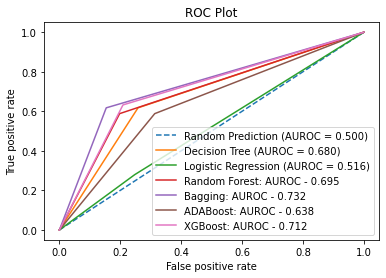

In [115]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label = 'Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(DT_fpr, DT_tpr,  label = 'Decision Tree (AUROC = %0.3f)' % DT_auc)
plt.plot(LR_fpr, LR_tpr, label = 'Logistic Regression (AUROC = %0.3f)' % LR_auc)
plt.plot(RF_fpr, RF_tpr, label = 'Random Forest: AUROC - %.3f' % RF_auc)
plt.plot(BAG_fpr, BAG_tpr, label = 'Bagging: AUROC - %.3f' % BAG_auc)
plt.plot(ADA_fpr, ADA_tpr, label = 'ADABoost: AUROC - %.3f' % ADA_auc)
plt.plot(XG_fpr, XG_tpr, label = 'XGBoost: AUROC - %.3f' % XG_auc)

# title
plt.title('ROC Plot')
# axis labels 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
# show legend
plt.legend()
# show plot
plt.show()